# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy import stats
from scipy.stats import linregress
import os

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 605


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = 'http://api.openweathermap.org/data/2.5/weather' # YOUR CODE HERE

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}?appid={weather_api_key}&units=imperial&q={city}" # YOUR CODE HERE

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json() # YOUR CODE HERE

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']# YOUR CODE HERE
        city_lng = city_weather['coord']['lon']# YOUR CODE HERE
        city_max_temp = city_weather['main']['temp_max']# YOUR CODE HERE
        city_humidity = city_weather['main']['humidity']# YOUR CODE HERE
        city_clouds = city_weather['clouds']['all']# YOUR CODE HERE
        city_wind = city_weather['wind']['speed']# YOUR CODE HERE
        city_country = city_weather['sys']['country']# YOUR CODE HERE
        city_date = city_weather['dt'] # YOUR CODE HERE

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | salto del guaira
Processing Record 2 of Set 1 | korkut
Processing Record 3 of Set 1 | okhotsk
Processing Record 4 of Set 1 | puerto natales
Processing Record 5 of Set 1 | bikenibeu village
Processing Record 6 of Set 1 | constitucion
Processing Record 7 of Set 1 | lib
Processing Record 8 of Set 1 | nagqu
Processing Record 9 of Set 1 | globe
City not found. Skipping...
Processing Record 10 of Set 1 | kodiak
Processing Record 11 of Set 1 | bubaque
Processing Record 12 of Set 1 | neryungri
Processing Record 13 of Set 1 | prince rupert
Processing Record 14 of Set 1 | coquimbo
Processing Record 15 of Set 1 | bilibino
Processing Record 16 of Set 1 | morondava
Processing Record 17 of Set 1 | west island
Processing Record 18 of Set 1 | atafu village
Processing Record 19 of Set 1 | wailua homesteads
Processing Record 20 of Set 1 | isyangulovo
Processing Record 21 of Set 1 | adamstown
Processing Record 22 o

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)# YOUR CODE HERE

# Show Record Count
city_data_df.count()

#city_data_df

City          582
Lat           582
Lng           582
Max Temp      582
Humidity      582
Cloudiness    582
Wind Speed    582
Country       582
Date          582
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,salto del guaira,-24.0625,-54.3069,75.90,36,0,3.06,PY,1727654485
1,korkut,38.7391,41.7822,55.67,37,0,2.98,TR,1727654486
2,okhotsk,59.3833,143.3000,41.45,48,27,17.56,RU,1727654488
3,puerto natales,-51.7236,-72.4875,27.86,80,44,4.54,CL,1727654489
4,bikenibeu village,1.3673,173.1241,82.20,73,66,7.81,KI,1727654490


In [6]:
# Export the City_Data into a csv

if not os.path.exists('output_data'):
    os.makedirs('output_data') # create folder if not
    
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,salto del guaira,-24.0625,-54.3069,75.90,36,0,3.06,PY,1727654485
1,korkut,38.7391,41.7822,55.67,37,0,2.98,TR,1727654486
2,okhotsk,59.3833,143.3000,41.45,48,27,17.56,RU,1727654488
3,puerto natales,-51.7236,-72.4875,27.86,80,44,4.54,CL,1727654489
4,bikenibeu village,1.3673,173.1241,82.20,73,66,7.81,KI,1727654490


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

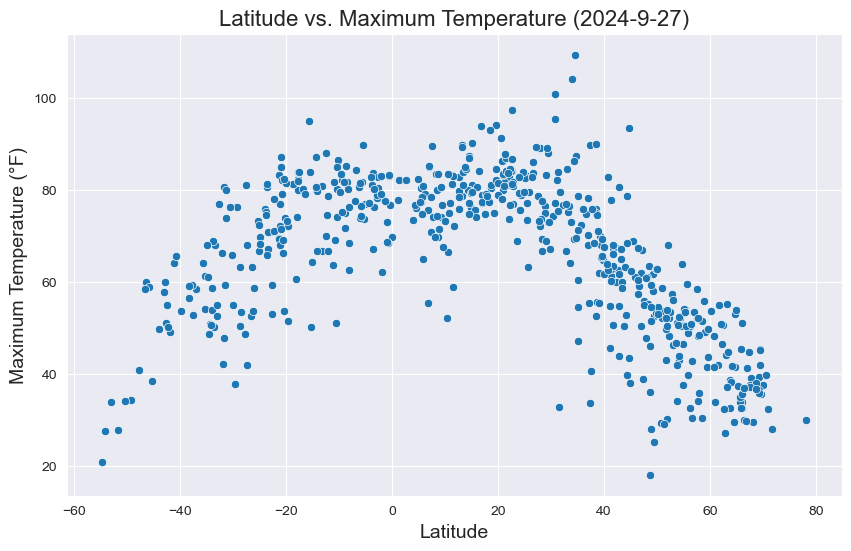

In [8]:
# Build scatter plot for latitude vs. temperature
import seaborn as sns

plt.figure (figsize = (10,6))
sns.scatterplot(x='Lat', y='Max Temp', data=city_data_df)

# Incorporate the other graph properties
plt.title('Latitude vs. Maximum Temperature (2024-9-27)', fontsize=16)  
plt.xlabel('Latitude', fontsize=14)  
plt.ylabel('Maximum Temperature (°F)', fontsize=14)  
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

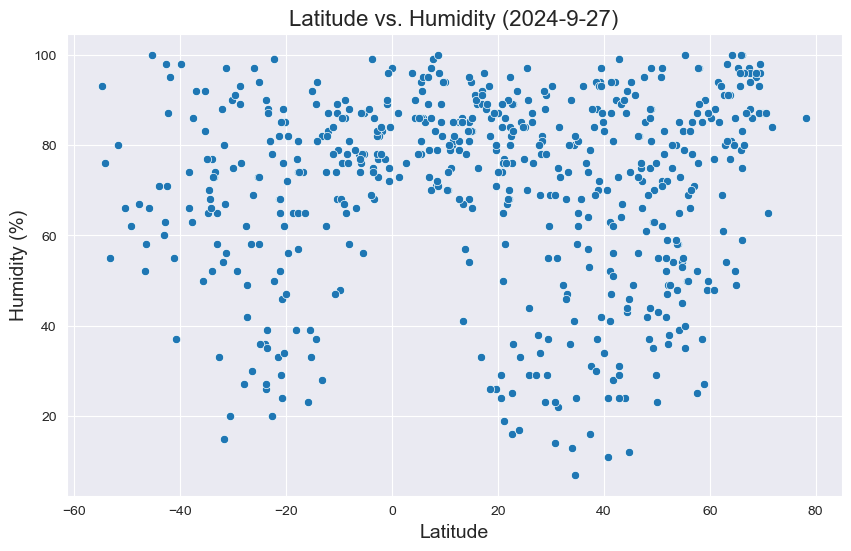

In [9]:
# Build the scatter plots for latitude vs. humidity
# YOUR CODE HERE

plt.figure (figsize = (10,6))
sns.scatterplot(x='Lat', y='Humidity', data=city_data_df)

# Incorporate the other graph properties
plt.title('Latitude vs. Humidity (2024-9-27)', fontsize=16)
plt.xlabel('Latitude', fontsize=14) 
plt.ylabel('Humidity (%)', fontsize=14)
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()


#### Latitude Vs. Cloudiness

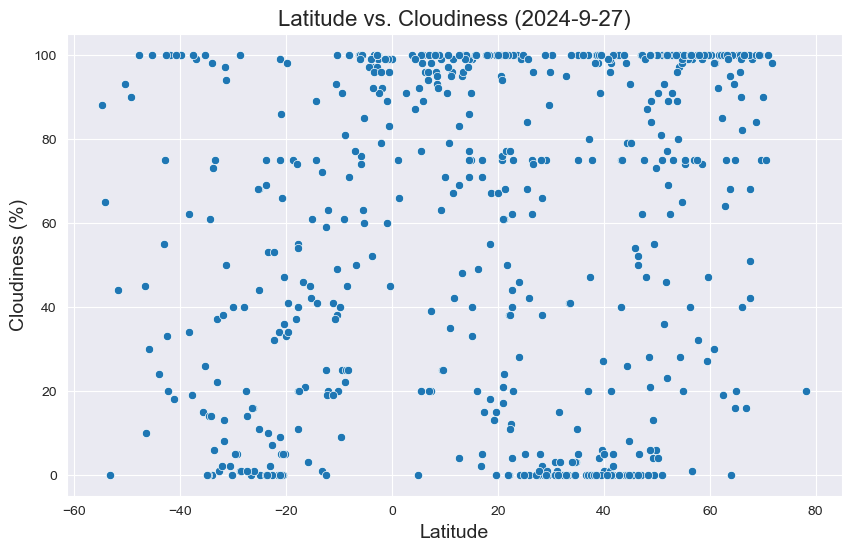

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.figure (figsize = (10,6))
sns.scatterplot(x='Lat', y='Cloudiness', data=city_data_df)

# Incorporate the other graph properties
plt.title('Latitude vs. Cloudiness (2024-9-27)', fontsize=16)
plt.xlabel('Latitude', fontsize=14)  
plt.ylabel('Cloudiness (%)', fontsize=14)
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

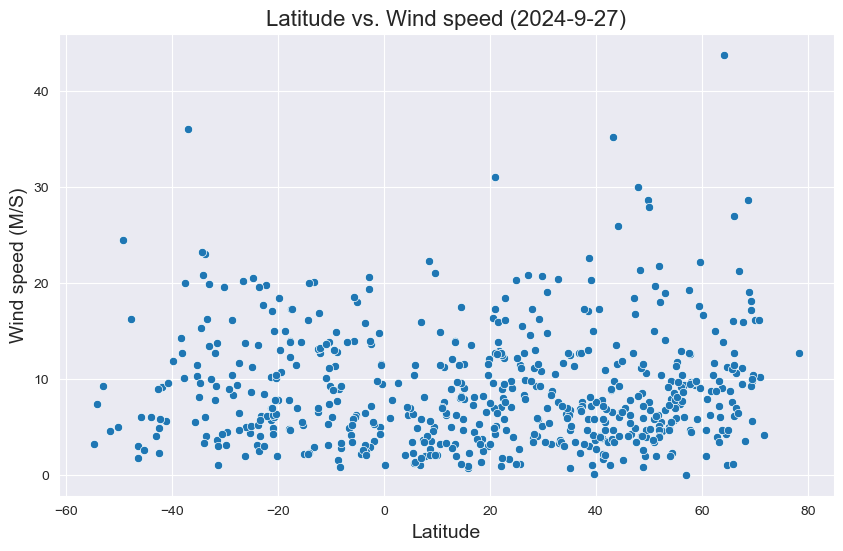

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.figure (figsize = (10,6))
sns.scatterplot(x='Lat', y='Wind Speed', data=city_data_df)

# Incorporate the other graph properties
plt.title('Latitude vs. Wind speed (2024-9-27)', fontsize=16)
plt.xlabel('Latitude', fontsize=14)
plt.ylabel('Wind speed (M/S)', fontsize=14)
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plot

def Linear_Weather_vs_latitude(x_values, y_values, y_label, position_x, position_y):
    # Perform linear regression
    (slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

    # Get regression values
    regress_values = x_values * slope + intercept

    # Create the line equation
    line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"

    # Create Plot
    plt.figure (figsize = (10,6))
    plt.scatter(x_values, y_values, color='blue')
    plt.plot(x_values, regress_values, "r-")

    # Label plot and annotate the line equation
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.annotate(line_eq, (position_x, position_y), fontsize=15, color="red")
    plt.title(f"Latitude vs {y_label}")

    # Print r^2 value
    r_squared = rvalue**2
    print(f"The r^2-value is: {r_squared}")

    # Show plot
    plt.show()

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,korkut,38.7391,41.7822,55.67,37,0,2.98,TR,1727654486
2,okhotsk,59.3833,143.3000,41.45,48,27,17.56,RU,1727654488
4,bikenibeu village,1.3673,173.1241,82.20,73,66,7.81,KI,1727654490
6,lib,8.3122,167.3766,83.41,71,96,3.71,MH,1727654492
7,nagqu,31.5000,92.0000,32.86,84,15,3.15,CN,1727654494


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,salto del guaira,-24.0625,-54.3069,75.90,36,0,3.06,PY,1727654485
3,puerto natales,-51.7236,-72.4875,27.86,80,44,4.54,CL,1727654489
5,constitucion,-35.3333,-72.4167,54.09,92,100,11.43,CL,1727654491
12,coquimbo,-29.9533,-71.3436,54.99,75,40,3.06,CL,1727654501
14,morondava,-20.2833,44.2833,73.89,85,5,1.97,MG,1727654503


###  Temperature vs. Latitude Linear Regression Plot

The r^2-value is: 0.6428104970704122


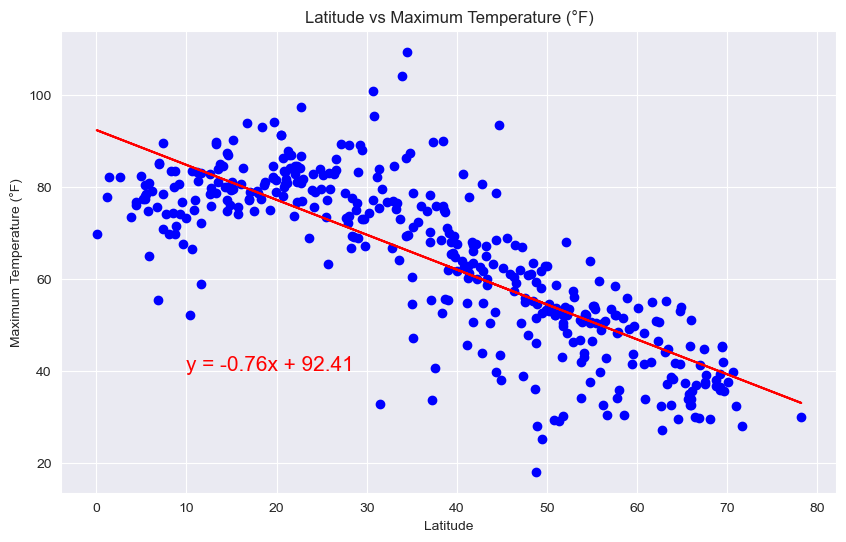

In [15]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE
Linear_Weather_vs_latitude(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'], "Maximum Temperature (°F)",10,40)


The r^2-value is: 0.5161673807686725


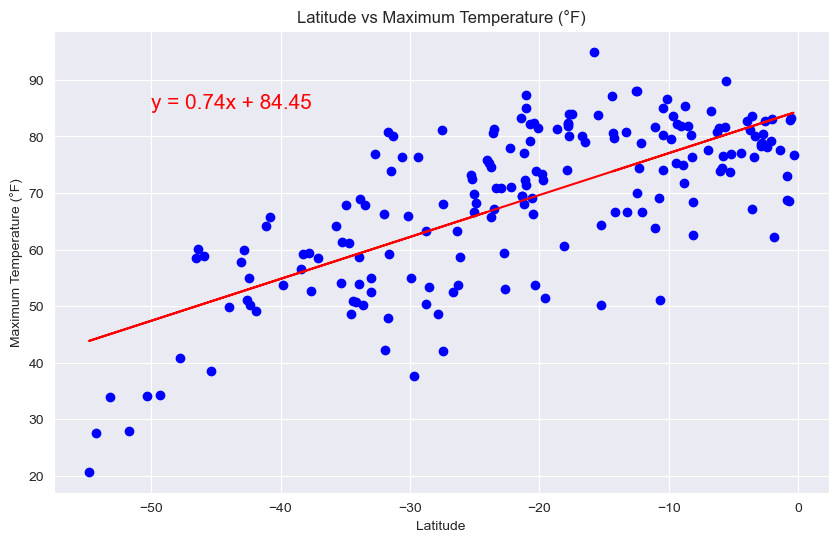

In [16]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE
Linear_Weather_vs_latitude(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'], 
                           "Maximum Temperature (°F)", -50,85)

**Discussion about the linear relationship:** 
In the Northern Hemisphere, there is a moderate negative correlation (y=−0.75x+93.89,R² Value: 0.70), 
indicating that as latitude increases, maximum temperature decreases. 
The R² value of 0.70 suggests that about 70% of the variance in temperature is explained by latitude.

Conversely, the Southern Hemisphere shows a moderate positive correlation (y=0.75x+83.91
R² Value: 0.59), where higher latitudes correspond to higher maximum temperatures. 
The R² value of 0.59 indicates that approximately 59% of the variance is explained by latitude. 

### Humidity vs. Latitude Linear Regression Plot

The r^2-value is: 0.0014464354560666725


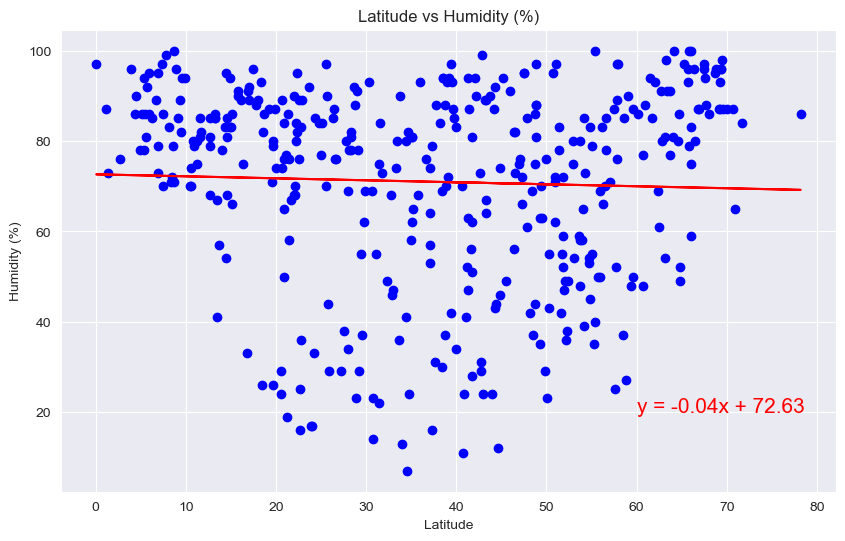

In [17]:
# Northern Hemisphere
# YOUR CODE HERE
Linear_Weather_vs_latitude(northern_hemi_df['Lat'], northern_hemi_df['Humidity'], 
                           "Humidity (%)", 60,20)

The r^2-value is: 0.020904624162240416


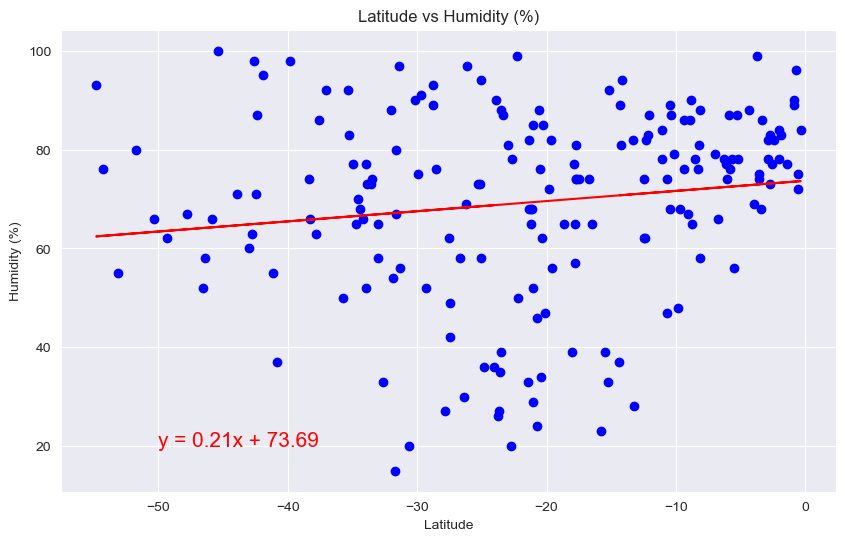

In [18]:
# Southern Hemisphere
# YOUR CODE HERE
Linear_Weather_vs_latitude(southern_hemi_df['Lat'], southern_hemi_df['Humidity'], 
                           "Humidity (%)",-50,20)

Both hemispheres show minimal correlation with latitude. 
In the Northern Hemisphere, there is a very weak positive correlation (y = 0.11x + 65.32, R² Value: 0.0091), 
indicating that only about 0.91% of the variance in humidity is explained by latitude. 
Similarly, the Southern Hemisphere exhibits an almost negligible correlation (y = 0.0x + 73.73, R² Value: 0.0000112), 
suggesting that latitude has virtually no effect on humidity levels, with less than 0.001% of the variance explained.

### Cloudiness vs. Latitude Linear Regression Plot

The r^2-value is: 0.009989706594077575


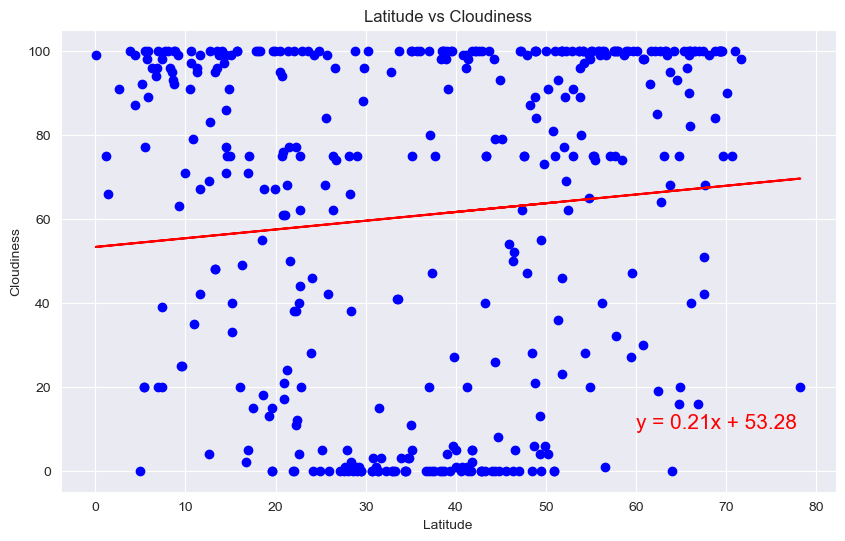

In [19]:
# Northern Hemisphere
# YOUR CODE HERE
Linear_Weather_vs_latitude(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'], 
                           "Cloudiness",60,10)

The r^2-value is: 0.06374367197696294


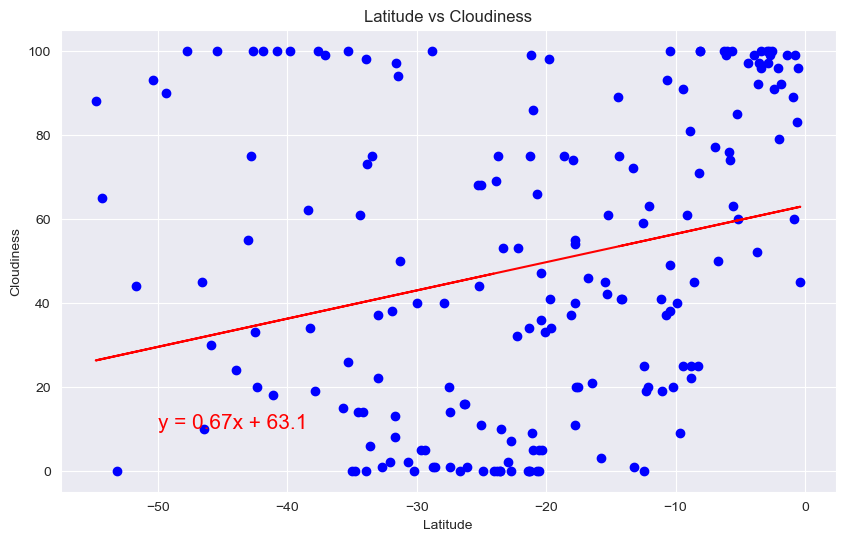

In [20]:
# Southern Hemisphere
# YOUR CODE HERE
Linear_Weather_vs_latitude(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'], "Cloudiness",-50,10)


Overall, both hemispheres demonstrate that latitude has a minimal effect on cloudiness,
with very low R² values indicating that other factors likely play a more significant role in determining cloud cover.
 Specifically, In the Northern Hemisphere, the analysis reveals a very weak positive correlation between latitude and cloudiness (y = 0.22x + 50.47, R² Value: 0.0116). The R² value of 0.0116 indicates that only about 1.16% of the variance in cloudiness is explained by latitude, suggesting that latitude has minimal impact on cloud cover in this region.
Similarly, in the Southern Hemisphere, there is an even weaker correlation (y = -0.09x + 52.19, R² Value: 0.0009), indicating a negligible relationship between latitude and cloudiness. The R² value of 0.0009 suggests that less than 0.1% of the variance in cloudiness can be attributed to latitude.

### Wind Speed vs. Latitude Linear Regression Plot

The r^2-value is: 0.032633333675413476


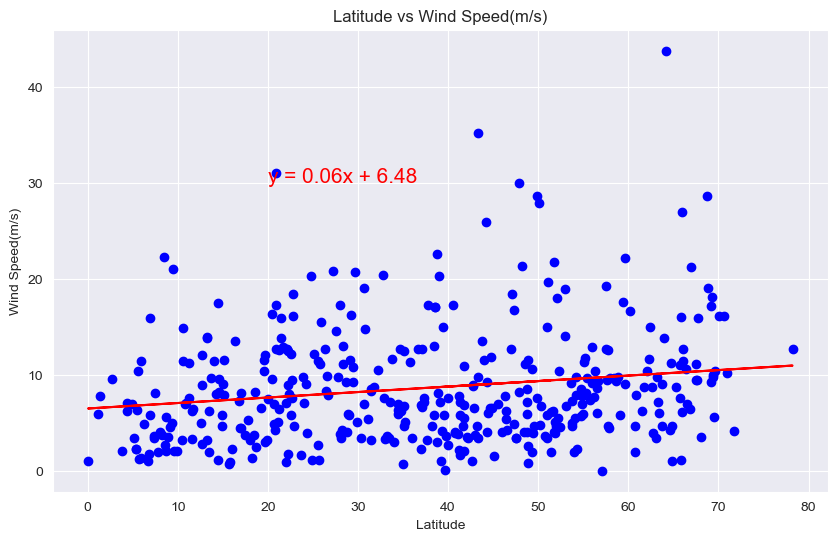

In [21]:
# Northern Hemisphere
# YOUR CODE HERE
Linear_Weather_vs_latitude(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'], 
                           "Wind Speed(m/s)",20,30)

The r^2-value is: 0.0018526063640206705


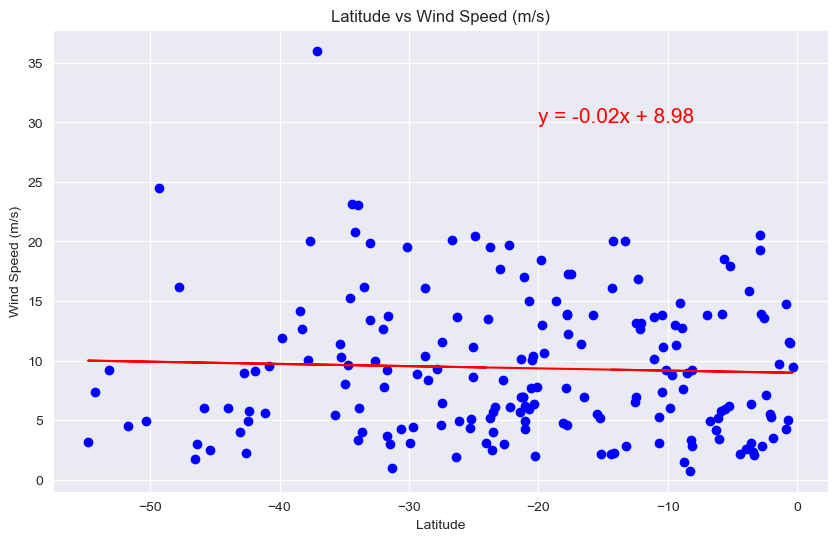

In [22]:
# Southern Hemisphere
# YOUR CODE HERE
Linear_Weather_vs_latitude(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'], 
                           "Wind Speed (m/s)", -20,30)

Overall, while the Southern Hemisphere exhibits a slightly stronger correlation than the Northern Hemisphere, both regions demonstrate that latitude has a relatively minor effect on wind speed.
In the Northern Hemisphere, the analysis indicates a very weak positive correlation between latitude and wind speed (y = 0.01x + 8.13, R² Value: 0.0027). The R² value of 0.0027 suggests that only about 0.27% of the variance in wind speed is explained by latitude, indicating that latitude has minimal influence on wind speed in this region.
In contrast, the Southern Hemisphere shows a somewhat stronger relationship (y = -0.15x + 6.34, R² Value: 0.0945), with a moderate negative correlation. The R² value of 0.0945 indicates that approximately 9.45% of the variance in wind speed can be attributed to latitude, suggesting a more significant but still limited impact compared to other influencing factors.
